<a href="https://colab.research.google.com/github/amudhan023/DeepLearning/blob/main/pytorch_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification is predicting whether one thing or other.
### Binary classifiction ex - Spam email or not spam
#### Multi classification ex - Find the food of the given image ( Pizza, Sushi, Steak)


In [3]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y) , X.shape, y.shape

(1000, 1000, (1000, 2), (1000,))

In [ ]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


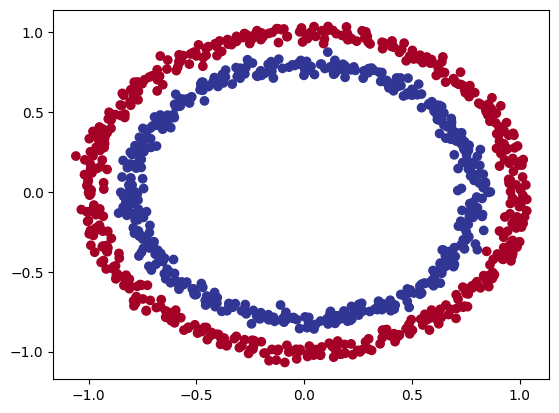

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.shape,y.shape, type(X), X.dtype, y.dtype

(torch.Size([1000, 2]),
 torch.Size([1000]),
 torch.Tensor,
 torch.float32,
 torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0()
model_0, next(model_0.parameters()),device


(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 Parameter containing:
 tensor([[ 0.5629, -0.1826],
         [ 0.3162, -0.6377],
         [-0.3874,  0.3404],
         [ 0.2454,  0.0256],
         [-0.6504, -0.5409]], requires_grad=True),
 'cpu')

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=100),
        nn.ReLU(),
        nn.Linear(in_features=100, out_features=100),
        nn.ReLU(),
        nn.Linear(in_features=100, out_features=100),
        nn.ReLU(),
        nn.Linear(in_features=100, out_features=1)
    )

  def forward(self,x):
    return self.layer(x)

In [ ]:
model=CircleModelV1()
model, model.state_dict()

(CircleModelV1(
   (layer): Sequential(
     (0): Linear(in_features=2, out_features=100, bias=True)
     (1): ReLU()
     (2): Linear(in_features=100, out_features=100, bias=True)
     (3): ReLU()
     (4): Linear(in_features=100, out_features=100, bias=True)
     (5): ReLU()
     (6): Linear(in_features=100, out_features=1, bias=True)
   )
 ),
 OrderedDict([('layer.0.weight',
               tensor([[ 0.4984,  0.1786],
                       [ 0.5924,  0.5021],
                       [ 0.4803,  0.6293],
                       [ 0.3599, -0.5031],
                       [-0.2904, -0.4130],
                       [-0.4944,  0.5009],
                       [-0.2536,  0.2351],
                       [-0.5263,  0.1867],
                       [ 0.6634,  0.0321],
                       [ 0.1920, -0.3065],
                       [-0.6676,  0.5434],
                       [ 0.5442, -0.5113],
                       [ 0.2094, -0.2796],
                       [ 0.3866,  0.0138],
                 

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # has built-in sigmoid function

optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=0.01)


In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)[:5]
y_logits

tensor([[-0.1102],
        [-0.1014],
        [-0.0952],
        [-0.1082],
        [-0.1098]])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4725],
        [0.4747],
        [0.4762],
        [0.4730],
        [0.4726]])

In [ ]:
### Train the model

def train(model, X, y):
  model.train()
  optimizer.zero_grad()
  y_logits = model(X) # Removed .squeeze(1) to keep shape (batch_size, 1)

  # For loss calculation, pass raw logits and unsqueeze y to match shape
  loss = loss_fn(y_logits, y.unsqueeze(1)) # Pass raw logits, reshape target y

  # For accuracy calculation, apply sigmoid and round
  y_pred_probs = torch.round(torch.sigmoid(y_logits)) # y_logits still (batch_size, 1) here
  acc = accuracy_fn(y_true = y, # y is still (batch_size,) for accuracy_fn
                    y_pred = y_pred_probs.squeeze(1)) # Squeeze y_pred_probs to match y
  loss.backward()
  optimizer.step()

  return acc,loss.item()

def test(model, X, y):
  model.eval()
  with torch.inference_mode():
    y_logits = model(X) # Removed .squeeze(1) to keep shape (batch_size, 1)

    # For loss calculation, pass raw logits and unsqueeze y to match shape
    loss = loss_fn(y_logits, y.unsqueeze(1)) # Pass raw logits, reshape target y

    # For accuracy calculation, apply sigmoid and round
    y_pred_probs = torch.round(torch.sigmoid(y_logits)) # y_logits still (batch_size, 1) here
    acc = accuracy_fn(y_true = y, # y is still (batch_size,) for accuracy_fn
                    y_pred = y_pred_probs.squeeze(1)) # Squeeze y_pred_probs to match y
    return acc,loss.item()

In [ ]:
def train_and_test():
  epochs = 100
  train_losses = []
  test_losses = []
  epoch_count = []
  train_accs = [] # New list for training accuracies
  test_accs = []  # New list for testing accuracies
  for epoch in range(epochs):
    train_acc,train_loss = train(model, X_train, y_train)
    test_acc,test_loss = test(model, X_test, y_test)

    if epoch %10 == 0:
      epoch_count.append(epoch)
      train_losses.append(train_loss)
      test_losses.append(test_loss)
      train_accs.append(train_acc) # Append train_acc
      test_accs.append(test_acc)   # Append test_acc

      print(f"Epoch : {epoch} | Train loss : {train_loss} | Train Accuracy : {train_acc} % | Test loss : {test_loss} | Test Accuracy : {test_acc} % ")

  return epoch_count, train_losses, test_losses, train_accs, test_accs # Return new lists

In [ ]:
epoch_count, train_losses, test_losses, train_accs, test_accs = train_and_test()

Epoch : 0 | Train loss : 0.6945452094078064 | Train Accuracy : 50.0 % | Test loss : 0.689561665058136 | Test Accuracy : 60.5 % 
Epoch : 10 | Train loss : 0.38344061374664307 | Train Accuracy : 96.75 % | Test loss : 0.38446158170700073 | Test Accuracy : 83.5 % 
Epoch : 20 | Train loss : 0.042434729635715485 | Train Accuracy : 99.625 % | Test loss : 0.051014404743909836 | Test Accuracy : 100.0 % 
Epoch : 30 | Train loss : 0.0028655335772782564 | Train Accuracy : 100.0 % | Test loss : 0.008927233517169952 | Test Accuracy : 100.0 % 
Epoch : 40 | Train loss : 0.0009637881885282695 | Train Accuracy : 100.0 % | Test loss : 0.0028699159156531096 | Test Accuracy : 100.0 % 
Epoch : 50 | Train loss : 0.0003760937543120235 | Train Accuracy : 100.0 % | Test loss : 0.0018739561783149838 | Test Accuracy : 100.0 % 
Epoch : 60 | Train loss : 0.00029961264226585627 | Train Accuracy : 100.0 % | Test loss : 0.0013805620837956667 | Test Accuracy : 100.0 % 
Epoch : 70 | Train loss : 0.0002129090134985745 | 

In [ ]:
def plot_loss_curve():
  plt.plot(epoch_count, train_losses, label="Train Loss")
  plt.plot(epoch_count, test_losses, label="Test Loss")
  plt.plot(epoch_count, train_accs, label="Train Accuracy") # Plot train_accs
  plt.plot(epoch_count, test_accs, label="Test Accuracy")   # Plot test_accs
  plt.xlabel("epoch")
  plt.ylabel("loss/accuracy") # Updated label as it now plots accuracy too
  plt.legend()
  plt.show()

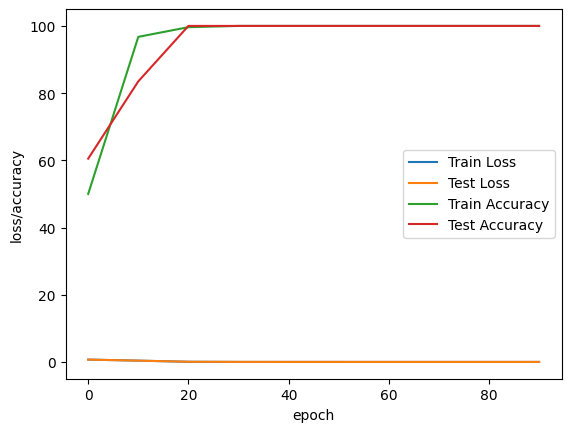

In [ ]:
plot_loss_curve()

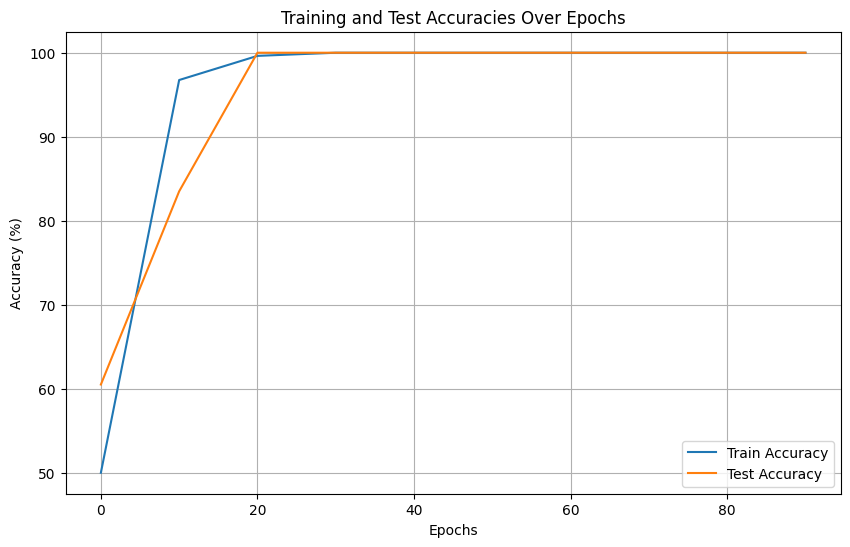

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epoch_count, train_accs, label='Train Accuracy')
plt.plot(epoch_count, test_accs, label='Test Accuracy')
plt.title('Training and Test Accuracies Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
display(circles.describe())

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


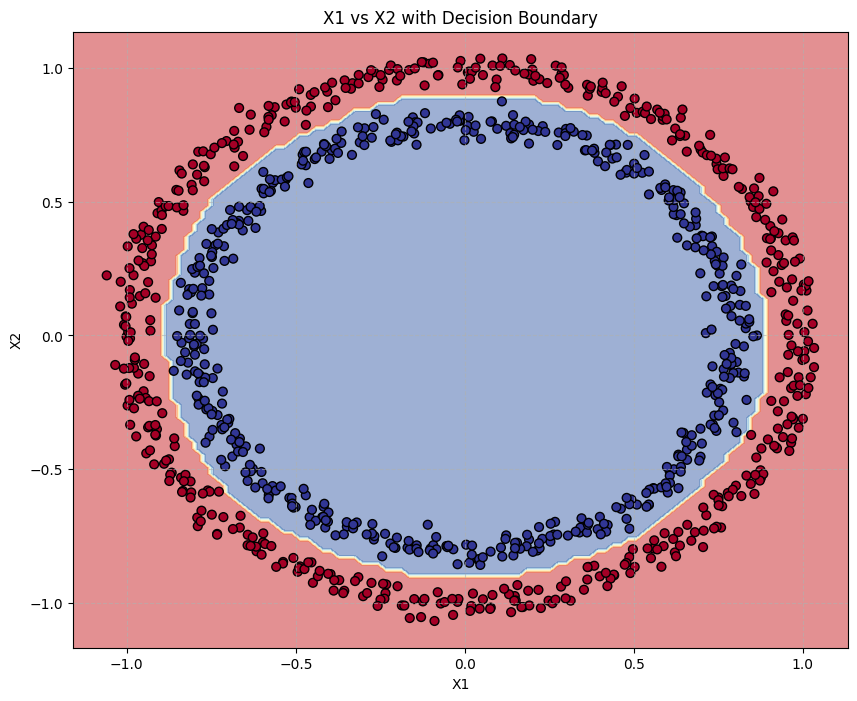

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Get data range for creating meshgrid
X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
Y_min, Y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                     np.linspace(Y_min, Y_max, 100))

# Flatten meshgrid points and convert to torch tensor for model input
X_grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()

# Make predictions with the model
model.eval()
with torch.inference_mode():
    y_logits_grid = model(X_grid).squeeze(1) # Get logits
    y_pred_grid = torch.round(torch.sigmoid(y_logits_grid)) # Apply sigmoid and round

# Reshape predictions back to meshgrid shape
Z = y_pred_grid.cpu().numpy().reshape(xx.shape)

# Plot the decision boundary contour
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)

# Plot the original data points
plt.scatter(X[:, 0].cpu().numpy(), X[:, 1].cpu().numpy(),
            c=y.cpu().numpy(),
            cmap=plt.cm.RdYlBu, s=40, edgecolors='k')

plt.title("X1 vs X2 with Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

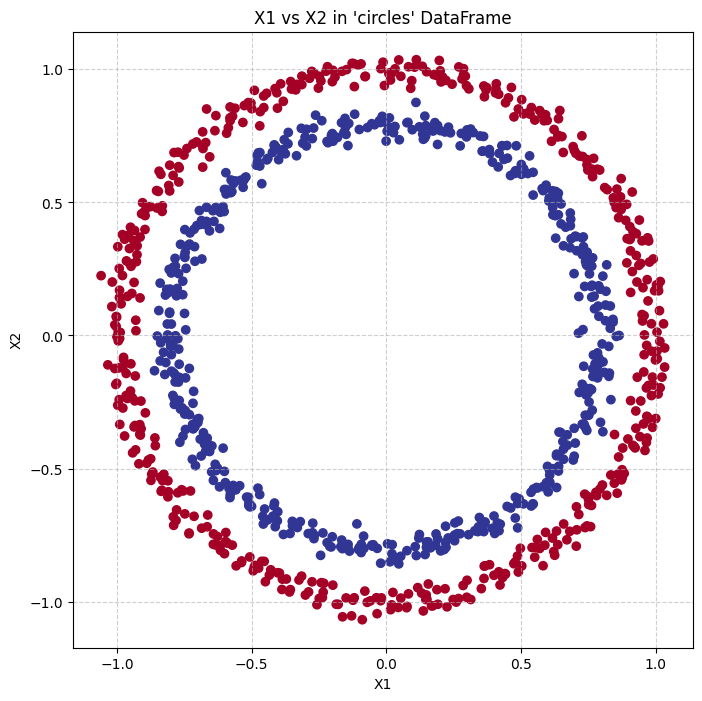

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=circles['label'],
            cmap=plt.cm.RdYlBu)
plt.title("X1 vs X2 in 'circles' DataFrame")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

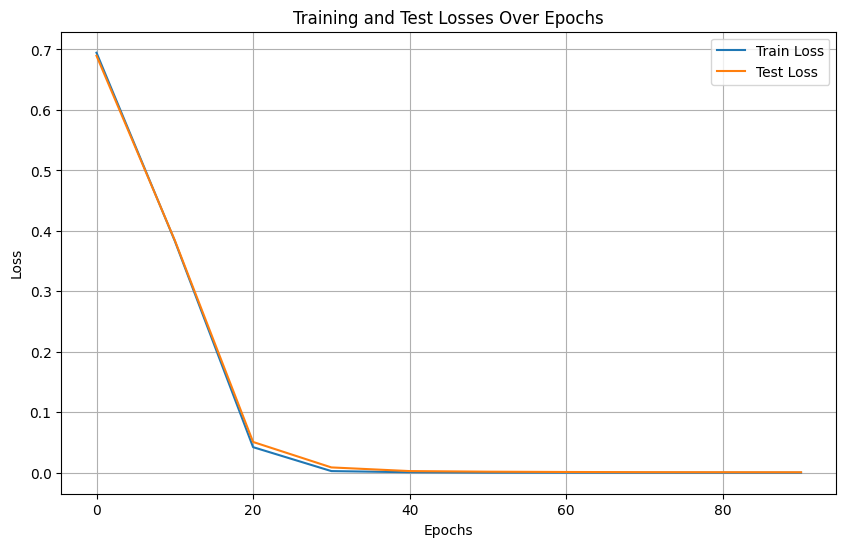

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(epoch_count, train_losses, label='Train Loss')
plt.plot(epoch_count, test_losses, label='Test Loss')
plt.title('Training and Test Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X = torch.arange(-10,10,1, dtype=torch.float32)
X

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

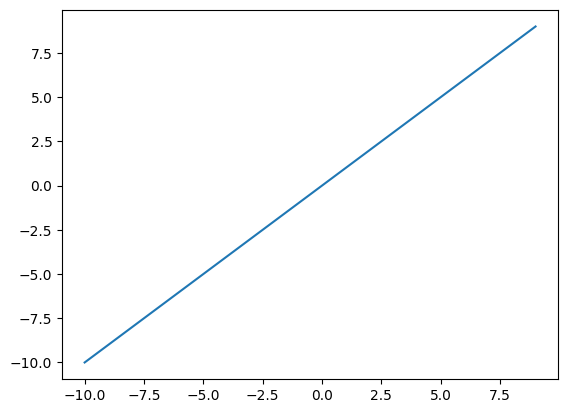

In [ ]:
plt.plot(X,X)

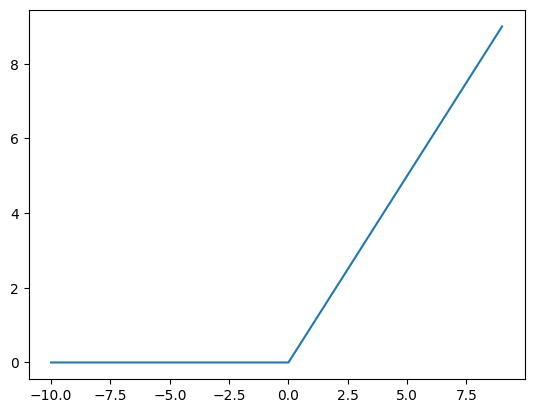

In [ ]:
plt.plot(X,torch.relu(X))

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(X)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

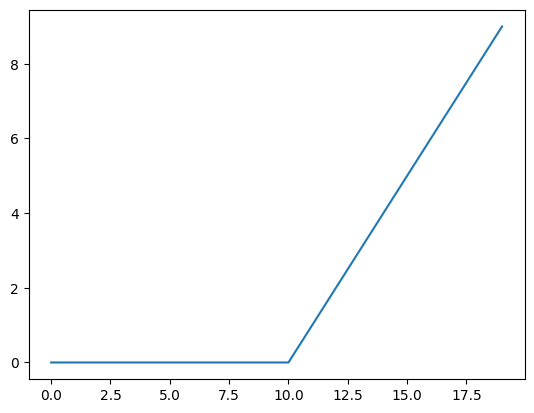

In [ ]:
# Plot ReLU activation function
plt.plot(relu(X))

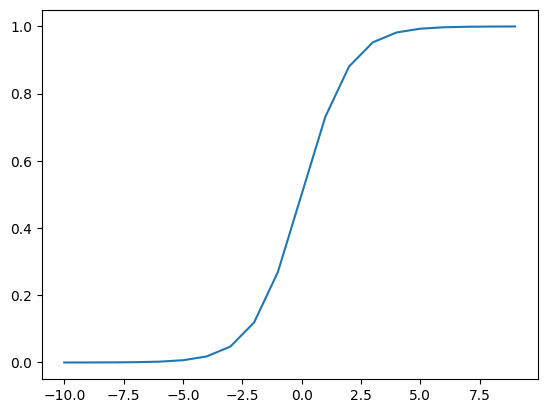

In [ ]:
plt.plot(X,torch.sigmoid(X))